# Fake News Project

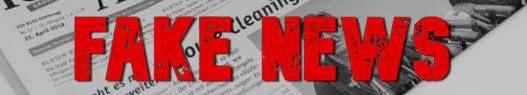

<b>Context:</b>          
Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.

<b>Content:</b>        
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

<b>What is a Fake News?</b>         
Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.          
For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.



<b>Workflow:</b>         
In this project, we are using some machine learning and Natural language processing libraries like NLTK, re (Regular Expression), Scikit Learn.

<b>Natural Language Processing:</b>         
Machine learning data only works with numerical features so we have to convert text data into numerical columns. So we have to preprocess the text and that is called natural language processing.
In-text preprocess we are cleaning our text by steaming, lemmatization, remove stopwords, remove special symbols and numbers, etc. After cleaning the data we have to feed this text data into a vectorizer which will convert this text data into numerical features.


<b>Dataset:</b>      
You can find many datasets for fake news detection on Kaggle or many other sites. I download these datasets from Kaggle. There are two datasets one for fake news and one for true news. In true news, there is 21417 news, and in fake news, there is 23481 news. You have to insert one label column zero for fake news and one for true news. We have to combine both the datasets using pandas built-in function.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import string
import nltk
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer


import warnings
warnings.filterwarnings('ignore')

In [2]:
true_news = pd.read_csv("True.csv")
true_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [3]:
fake_news = pd.read_csv("Fake.csv")
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
type(true_news)

pandas.core.frame.DataFrame

In [5]:
type(fake_news)

pandas.core.frame.DataFrame

In [6]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
true_news.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [8]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
fake_news.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [10]:
true_news.sample(3)

,title,text,subject,date
7090,Democrats search for answers to stem a spreadi...,"MONTPELIER, Vt. (Reuters) - Still sifting thro...",politicsNews,"November 22, 2016"
15187,Trump sets out strong trade message at Asia-Pa...,"DANANG, Vietnam (Reuters) - U.S. President Don...",worldnews,"November 10, 2017"
7676,Venezuela crisis enters dangerous phase as Mad...,CARACAS (Reuters) - In a curious convergence o...,politicsNews,"October 27, 2016"


In [11]:
fake_news.sample(3)

,title,text,subject,date
13740,OBAMA CONDEMNS TRUMP…Says U.S. Is “Blessed Wit...,"New York City begs to differ Of course, this i...",politics,"Jun 7, 2016"
23470,Arizona Rancher Protesting in Oregon is Target...,RTOne of the most visible members of the armed...,Middle-east,"January 20, 2016"
19669,BREAKING! NEW Wikileaks Email: Confidential Au...,The report exposed in an email shared by Wikil...,left-news,"Nov 6, 2016"


In [12]:
true_news.shape

(21417, 4)

<b>The true news dataset consists of 21417 rows and 4 columns.</b>

In [13]:
fake_news.shape

(23481, 4)

<b>The fake news dataset consists of 23481 rows and 4 columns.</b>

In [14]:
true_news.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [15]:
fake_news.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [16]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [17]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [18]:
# Let's check the null values in the true news dataset

true_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

<b>As we can see, there are no null values in the true news dataset.</b>

In [19]:
# Let's check the null values in the fake news dataset

fake_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

<b>As we can see, there are no null values in the fakee news dataset.</b>

In [20]:
true_news.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [21]:
fake_news.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


# Let us insert one label column zero for fake news and one for true news.

In [22]:
fake_news['label']= 0

In [23]:
# Let's check the fake news dataset again after adding one more column

fake_news

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [24]:
true_news['label']= 1

In [25]:
# Let's check the true news dataset again after adding one more column

true_news

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [26]:
# Now, let's combine both the datasets

df = pd.concat([fake_news, true_news], ignore_index=True)
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [27]:
# Random Shuffling the dataframe

df = df.sample(frac = 1)

In [28]:
df.head()

,title,text,subject,date,label
26443,France's Macron trades barbs for diplomacy wit...,PARIS (Reuters) - France’s president has not g...,politicsNews,"June 29, 2017",1
17777,WATCH: IRRELEVANT DEM POLITICAL ANALYST James ...,"On Friday s broadcast of HBO s Real Time, fo...",left-news,"Oct 21, 2017",0
3588,Trump Supporters Terrorize An American Woman ...,Donald Trump s deplorable supporters strike ag...,News,"December 3, 2016",0
33494,Leak of Senate encryption bill prompts swift b...,WASHINGTON (Reuters) - Security researchers an...,politicsNews,"April 8, 2016",1
32637,Senate Democrats push for new gun control meas...,(Reuters) - Leading U.S. Senate Democrats on M...,politicsNews,"June 13, 2016",1


In [29]:
df.tail()

,title,text,subject,date,label
38440,"North Korean soldier, shot and wounded, defect...",SEOUL (Reuters) - A North Korean soldier defec...,worldnews,"November 13, 2017",1
41601,Young German conservatives call for change aft...,"DRESDEN, Germany (Reuters) - The youth wing of...",worldnews,"October 6, 2017",1
5884,"Seth MacFarlane Responds To Orlando Shooting,...",The creator of Family Guy responded on Sunday ...,News,"June 13, 2016",0
40289,"Exclusive: Returning Rohingya may lose land, c...","SITTWE, Myanmar (Reuters) - Rohingya Muslims w...",worldnews,"October 22, 2017",1
8125,White People Have Gone Absolutely CRAZY In SN...,After Beyonc came out with her new single Fo...,News,"February 14, 2016",0


In [30]:
df.sample(3)

,title,text,subject,date,label
43118,"Egypt's Sisi urges Palestinians to unite, co-e...",UNITED NATIONS (Reuters) - Egyptian President ...,worldnews,"September 19, 2017",1
31362,Financial markets continue to price in Clinton...,NEW YORK (Reuters) - Wall Street stock index f...,politicsNews,"October 10, 2016",1
17898,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",left-news,"Sep 28, 2017",0


In [31]:
df.shape

(44898, 5)

<b>The dataset consists of 44898 rows and 5 columns.</b>

In [32]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

<b>The dataset consists of 5 columns. Here, the column 'label' is the target variable and the remaining columns are the features.</b>

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 26443 to 8125
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [34]:
# Let's check the null values

df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

<b>As we can see, there are no null values in the dataset.</b>

<AxesSubplot:>

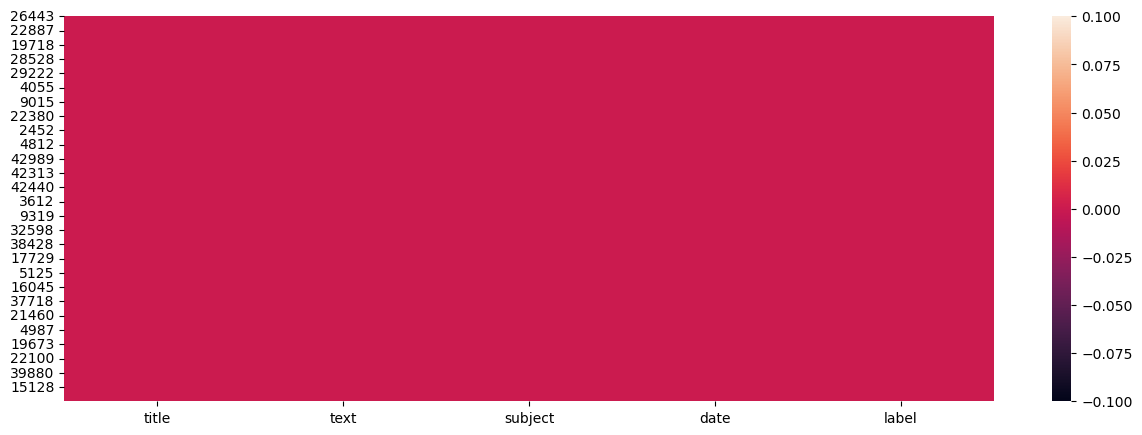

In [35]:
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull())

<b>We can confirm that there are no null values in the dataset by looking at the Heat Map.</b>

In [36]:
# Let's check the number of unique values present in the dataset

df.nunique()

title      38729
text       38646
subject        8
date        2397
label          2
dtype: int64

In [37]:
# Let's drop the irrelevant columns, i.e., 'title', 'text' and 'date' as they serve no purpose in our analysis

df.drop(['title', 'subject', 'date'], axis=1, inplace=True)

In [38]:
df

,text,label
26443,PARIS (Reuters) - France’s president has not g...,1
17777,"On Friday s broadcast of HBO s Real Time, fo...",0
3588,Donald Trump s deplorable supporters strike ag...,0
33494,WASHINGTON (Reuters) - Security researchers an...,1
32637,(Reuters) - Leading U.S. Senate Democrats on M...,1
...,...,...
38440,SEOUL (Reuters) - A North Korean soldier defec...,1
41601,"DRESDEN, Germany (Reuters) - The youth wing of...",1
5884,The creator of Family Guy responded on Sunday ...,0
40289,"SITTWE, Myanmar (Reuters) - Rohingya Muslims w...",1


# Pre-Processing

In [39]:
# Convert the column "text" to lowercase

df['text'] = df['text'].apply(lambda x: x.lower())
df.head()

,text,label
26443,paris (reuters) - france’s president has not g...,1
17777,"on friday s broadcast of hbo s real time, fo...",0
3588,donald trump s deplorable supporters strike ag...,0
33494,washington (reuters) - security researchers an...,1
32637,(reuters) - leading u.s. senate democrats on m...,1


In [40]:
# Remove punctuations from the column "text"

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['text'] = df['text'].apply(punctuation_removal)

In [41]:
# Removing stopwords from the column "text"

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\safiy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# Now, let's check the dataset

df.head()

,text,label
26443,paris reuters france’s president given donald ...,1
17777,friday broadcast hbo real time former clinton ...,0
3588,donald trump deplorable supporters strike agai...,0
33494,washington reuters security researchers civil ...,1
32637,reuters leading us senate democrats monday urg...,1


# Data Visualization

0    23481
1    21417
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

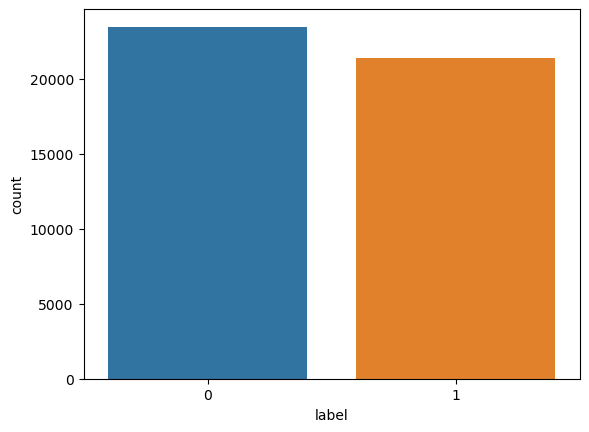

In [43]:
print(df['label'].value_counts())
sns.countplot(df['label'])

In [44]:
from wordcloud import WordCloud

In [45]:
wc = WordCloud(width = 500, height = 300, min_font_size= 10, background_color= 'black')

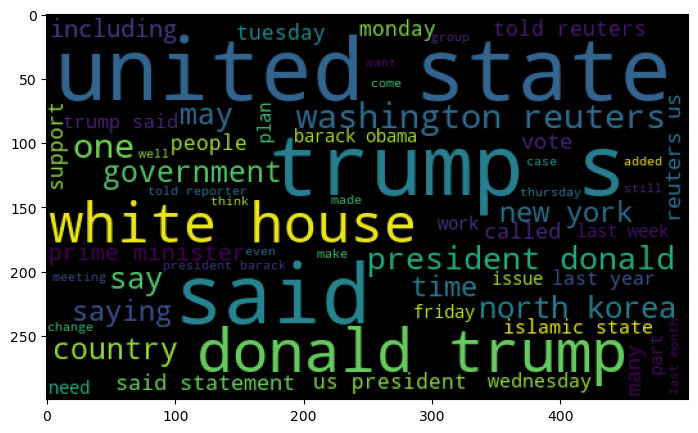

In [46]:
# Generating Word Cloud for True News

true_wordcloud = wc.generate(df[df['label']==1]['text'].str.cat(sep = " "))
plt.figure(figsize=(10,5))
plt.imshow(true_wordcloud)
plt.show()

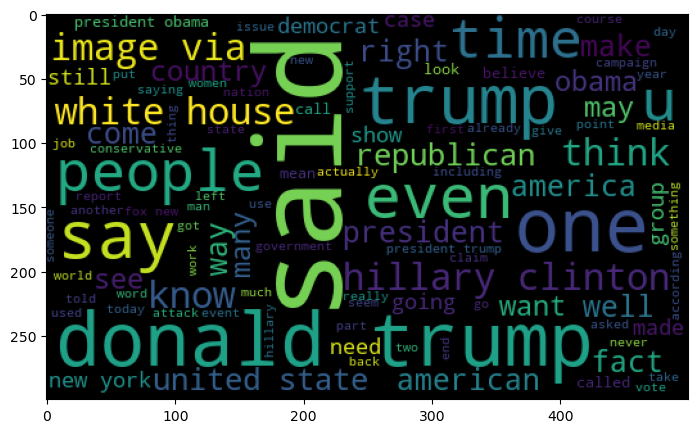

In [47]:
# Generating Word Cloud for Fake News

fake_wordcloud = wc.generate(df[df['label']==0]['text'].str.cat(sep = " "))
plt.figure(figsize=(10,5))
plt.imshow(fake_wordcloud)
plt.show()

In [48]:
true_corpus = []

for msg in df[df['label']==1]['text'].tolist():
    for word in msg.split():
        true_corpus.append(word)

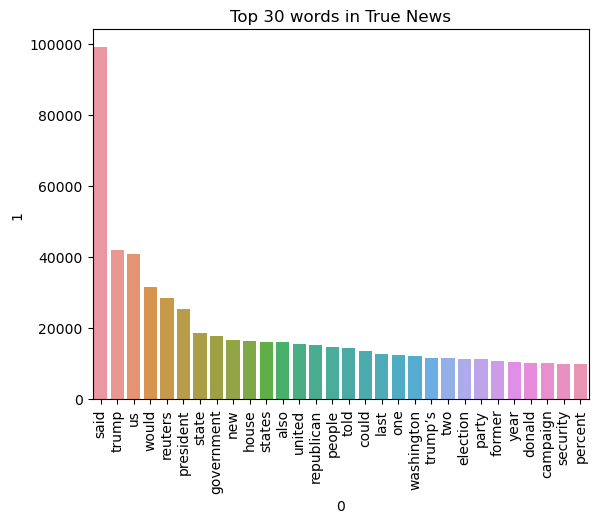

In [49]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(true_corpus).most_common(30))[0] , pd.DataFrame(Counter(true_corpus).most_common(30))[1])

plt.title("Top 30 words in True News")
plt.xticks(rotation = "vertical")
plt.show()

In [50]:
fake_corpus = []

for msg in df[df['label']==0]['text'].tolist():
    for word in msg.split():
        fake_corpus.append(word)

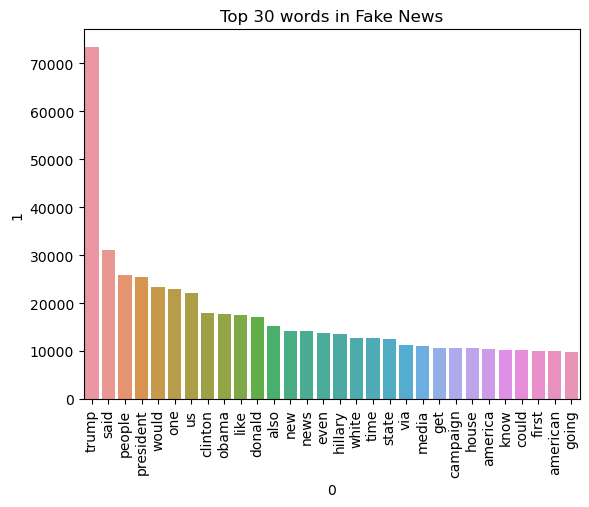

In [51]:
sns.barplot(pd.DataFrame(Counter(fake_corpus).most_common(30))[0] , pd.DataFrame(Counter(fake_corpus).most_common(30))[1])

plt.title("Top 30 words in Fake News")
plt.xticks(rotation = "vertical")
plt.show()

In [52]:
x = df.drop('label', axis=1)

y = df['label']

# Converting text to vectors using TfidfVectorizer

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
vectorizer = TfidfVectorizer(max_features=3000)
message_mat = vectorizer.fit_transform(df['text'])
message_mat

<44898x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 5103940 stored elements in Compressed Sparse Row format>

In [55]:
x = message_mat
print(x.shape)
print(y.shape)

(44898, 3000)
(44898,)


# Finding best random state

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [57]:
from sklearn.linear_model import LogisticRegression

maxAccu = 0
maxRS = 0
for i in range(1,200):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state =i)
    LR = LogisticRegression()
    LR.fit(xtrain, ytrain)
    pred = LR.predict(xtest)
    acc=accuracy_score(ytest, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu, " on Random_state ", maxRS)

Best accuracy is  0.9916258351893096  on Random_state  44


In [58]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state=maxRS)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Model Building

# Logistic Regression

In [60]:
LR.fit(xtrain,ytrain)

predlr = LR.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,predlr)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,predlr)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,predlr)}")

Accuracy Score: 99.16258351893096%
roc_auc_score: 99.17110087996403%
---------------------------------------------------
Confusion Matrix : 
 [[5797   60]
 [  34 5334]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5857
           1       0.99      0.99      0.99      5368

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



# Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
pred_dt = dt.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,pred_dt)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_dt)*100}%")
print("---------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_dt)}")

Accuracy Score: 99.5011135857461%
roc_auc_score: 99.49472137356118%
---------------------------------------------------
Confusion Matrix : 
 [[5836   21]
 [  35 5333]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5857
           1       1.00      0.99      0.99      5368

    accuracy                           1.00     11225
   macro avg       1.00      0.99      1.00     11225
weighted avg       1.00      1.00      1.00     11225



# Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
pred_rfc = rfc.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,pred_rfc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_rfc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_rfc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_rfc)}")

Accuracy Score: 99.82182628062361%
roc_auc_score: 99.82382049120531%
---------------------------------------------------
Confusion Matrix : 
 [[5844   13]
 [   7 5361]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5857
           1       1.00      1.00      1.00      5368

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



# Linear Support Vector Machine Classifier

In [63]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(xtrain,ytrain)
pred_svc = svc.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,pred_svc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_svc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_svc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_svc)}")

Accuracy Score: 99.60801781737194%
roc_auc_score: 99.60649484599038%
---------------------------------------------------
Confusion Matrix : 
 [[5836   21]
 [  23 5345]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5857
           1       1.00      1.00      1.00      5368

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



# XGB Classifier

In [64]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
pred_xgb = xgb.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest,pred_xgb)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_xgb)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_xgb)}")

Accuracy Score: 99.78619153674832%
roc_auc_score: 99.78811799197312%
--------------------------------------------------------
Confusion Matrix : 
 [[5842   15]
 [   9 5359]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5857
           1       1.00      1.00      1.00      5368

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



# Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
pred_gbc = gbc.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest,pred_gbc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_gbc)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_gbc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_gbc)}")

Accuracy Score: 99.55456570155901%
roc_auc_score: 99.56071772169646%
--------------------------------------------------------
Confusion Matrix : 
 [[5823   34]
 [  16 5352]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5857
           1       0.99      1.00      1.00      5368

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



# Stochastic Gradient Descent Classifier

In [66]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(xtrain,ytrain)
pred_sgd = sgd.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest,pred_sgd)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_sgd)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_sgd)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_sgd)}")

Accuracy Score: 99.34966592427617%
roc_auc_score: 99.3612608195271%
--------------------------------------------------------
Confusion Matrix : 
 [[5804   53]
 [  20 5348]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5857
           1       0.99      1.00      0.99      5368

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



# Bernoulli Naive Bayes Classifier

In [67]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(xtrain,ytrain)
pred_bnb = bnb.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest,pred_bnb)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_bnb)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_bnb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_bnb)}")

Accuracy Score: 97.41648106904232%
roc_auc_score: 97.44734127861575%
--------------------------------------------------------
Confusion Matrix : 
 [[5666  191]
 [  99 5269]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      5857
           1       0.97      0.98      0.97      5368

    accuracy                           0.97     11225
   macro avg       0.97      0.97      0.97     11225
weighted avg       0.97      0.97      0.97     11225



# Multinomial Naive Bayes Classifier

In [68]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(xtrain,ytrain)
pred_mnb = mnb.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest,pred_mnb)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_mnb)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_mnb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_mnb)}")

Accuracy Score: 94.65478841870824%
roc_auc_score: 94.67495395093238%
--------------------------------------------------------
Confusion Matrix : 
 [[5518  339]
 [ 261 5107]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      5857
           1       0.94      0.95      0.94      5368

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



# Light Gradient Boosting Machine Classifier

In [69]:
import lightgbm 
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(xtrain,ytrain)
pred_lgb = lgb.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest,pred_lgb)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_lgb)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_lgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_lgb)}")

Accuracy Score: 99.77728285077951%
roc_auc_score: 99.78113652330367%
--------------------------------------------------------
Confusion Matrix : 
 [[5839   18]
 [   7 5361]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5857
           1       1.00      1.00      1.00      5368

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



# Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score


print("Cross validation score of LogisticRegression() is:", cross_val_score(LR,x,y,cv=5).mean())
print("Cross validation score of DecisionTreeClassifier() is:", cross_val_score(dt,x,y,cv=5).mean())
print("Cross validation score of RandomForestClassifier() is:", cross_val_score(rfc,x,y,cv=5).mean())
print("Cross validation score of SVC() is:", cross_val_score(svc,x,y,cv=5).mean())
print("Cross validation score of XGBClassifier() is:", cross_val_score(xgb,x,y,cv=5).mean())
print("Cross validation score of GradientBoostingClassifier() is:", cross_val_score(gbc,x,y,cv=5).mean())
print("Cross validation score of SGDClassifier() is:", cross_val_score(sgd,x,y,cv=5).mean())
print("Cross validation score of BernoulliNB() is:", cross_val_score(bnb,x,y,cv=5).mean())
print("Cross validation score of MultinomialNB() is:", cross_val_score(mnb,x,y,cv=5).mean())
print("Cross validation score of LGBMClassifier() is:", cross_val_score(lgb,x,y,cv=5).mean())

Cross validation score of LogisticRegression() is: 0.9888191253484063
Cross validation score of DecisionTreeClassifier() is: 0.9956791037538469
Cross validation score of RandomForestClassifier() is: 0.998240452667211
Cross validation score of SVC() is: 0.9949218207988896
Cross validation score of XGBClassifier() is: 0.9977504476542768
Cross validation score of GradientBoostingClassifier() is: 0.9956790739887751
Cross validation score of SGDClassifier() is: 0.9918036442865574
Cross validation score of BernoulliNB() is: 0.9730277626265295
Cross validation score of MultinomialNB() is: 0.9461222684655685
Cross validation score of LGBMClassifier() is: 0.9977727193691986


<b>As we can see, Light Gradient Boosting Machine Classifier is the best model.</b>

# Plotting ROC-AUC curves

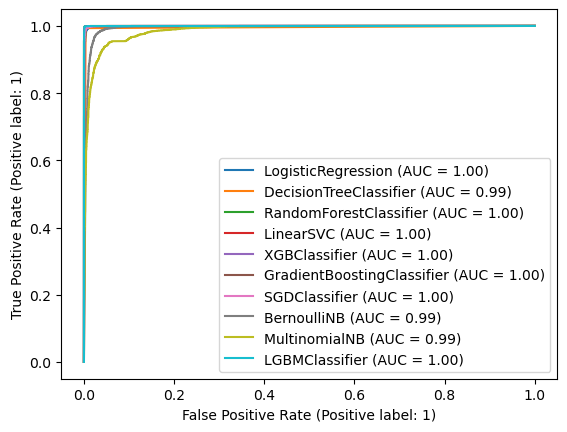

In [71]:
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(LR, xtest, ytest)
plot_roc_curve(dt, xtest, ytest, ax=disp.ax_)     
plot_roc_curve(rfc, xtest, ytest, ax=disp.ax_)
plot_roc_curve(svc, xtest, ytest, ax=disp.ax_)
plot_roc_curve(xgb, xtest, ytest, ax=disp.ax_)
plot_roc_curve(gbc, xtest, ytest, ax=disp.ax_)
plot_roc_curve(sgd, xtest, ytest, ax=disp.ax_)
plot_roc_curve(bnb, xtest, ytest, ax=disp.ax_)
plot_roc_curve(mnb, xtest, ytest, ax=disp.ax_)
plot_roc_curve(lgb, xtest, ytest, ax=disp.ax_)


plt.legend(prop={'size':10}, loc='lower right')
plt.show()

# Hyperparameter Tuning

In [72]:
# Now, let's perform Hyperparameter Tuning for Light Gradient Boosting Machine Classifier  

from sklearn.model_selection import GridSearchCV


parameters = {'num_leaves': (10, 20, 30),
              'min_child_samples': (100, 200, 300),
              'max_depth': (-1, 0, 1),
              'learning_rate': (0.1, 0.2, 0.3),
              'early_stopping_round': (0, 1)}


GCV = GridSearchCV(LGBMClassifier(), parameters, cv=5)

GCV.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'early_stopping_round': (0, 1),
                         'learning_rate': (0.1, 0.2, 0.3),
                         'max_depth': (-1, 0, 1),
                         'min_child_samples': (100, 200, 300),
                         'num_leaves': (10, 20, 30)})

In [73]:
GCV.best_params_

{'early_stopping_round': 0,
 'learning_rate': 0.3,
 'max_depth': -1,
 'min_child_samples': 200,
 'num_leaves': 10}

In [74]:
#Let's train and test our model using the best parameters

model = LGBMClassifier(early_stopping_round= 0, learning_rate= 0.3, max_depth= -1, min_child_samples= 100, num_leaves= 10)
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
print(accuracy_score(ytest,pred)*100)


print(f"Accuracy Score: {accuracy_score(ytest,pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(ytest,pred_rfc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred)}")
print("---------------------------------------------------")

99.78619153674832
Accuracy Score: 99.78619153674832%
---------------------------------------------------
roc_auc_score: 99.82382049120531%
---------------------------------------------------
Confusion Matrix : 
 [[5841   16]
 [   8 5360]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5857
           1       1.00      1.00      1.00      5368

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

---------------------------------------------------


<b>After Hyperparameter Tuning, we got an accuracy score of 99.78%.</b>

# ROC curve for final model

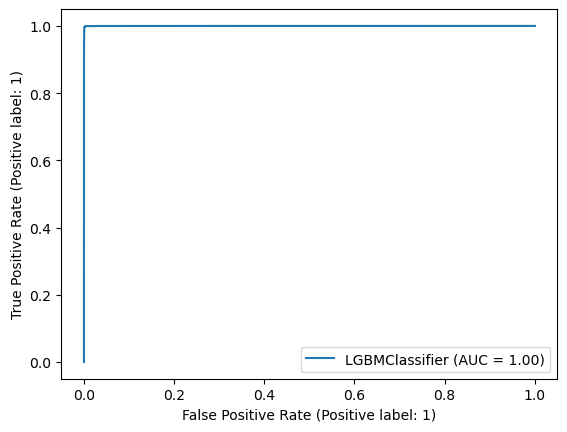

In [75]:
#Lets check our model performance after hyperparameter tuning

plot_roc_curve(model, xtest, ytest)
plt.show()

# Saving the model

In [76]:
import joblib

joblib.dump(model,"Fake News Detection Project.pkl")

['Fake News Detection Project.pkl']

# Loading the model

In [77]:
loadmodel = joblib.load("Fake News Detection Project.pkl")

In [81]:
import numpy as np

prediction = model.predict(xtest)
df_final = pd.DataFrame()
df_final['Predicted Spam News'] = prediction
df_final['Actual Spam News'] = y
df_final

,Predicted Spam News,Actual Spam News
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
11220,1,0
11221,0,0
11222,1,0
11223,1,0


# Converting the dataframe into CSV format and saving it

In [82]:
df_final.to_csv('Fake News Detection Project.csv', index=False)

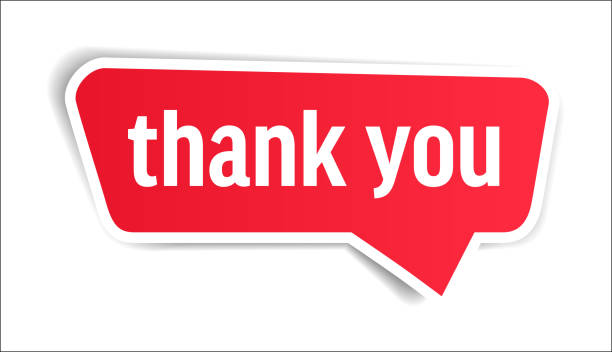